<h3>Analisis Censo Poblacion Ejemplo 2020 </h3>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df_begin  = pd.read_csv("Censo2020_CPV_CB_Personas_ejemplo_csv.CSV")

In [3]:
df_begin.columns

Index(['ENT', 'MUN', 'LOC', 'AGEB', 'MZA', 'SEG', 'ID_VIV', 'ID_PERSONA',
       'TIPO_REG', 'CLASE_VIV', 'NUMPER', 'SEXO', 'EDAD', 'PARENT',
       'ENT_PAIS_NAC', 'AFRODES', 'DHSERSAL1', 'DHSERSAL2', 'RELIGION',
       'DIS_VER', 'DIS_OIR', 'DIS_CAMINAR', 'DIS_RECORDAR', 'DIS_BANARSE',
       'DIS_HABLAR', 'DIS_MENTAL', 'HLENGUA', 'QDIALECT_INALI', 'HESPANOL',
       'ASISTEN', 'NIVACAD', 'ESCOLARI', 'ALFABET', 'ESCOACUM',
       'ENT_PAIS_RES_5A', 'MUN_RES_5A', 'CAUSA_MIG_V', 'SITUA_CONYUGAL',
       'CONACT', 'HIJOS_NAC_VIVOS', 'HIJOS_FALLECIDOS', 'TAMLOC', 'TAMLOC14'],
      dtype='object')

ENT -> ENTIDAD FEDERATIVA

MUN -> MUNICIPIO

CLASE_VIV -> CLASE VIVIENDA

SEXO -> SEXO 

EDAD -> EDAD

DHSERSAL1 -> IMMS

DHSERSAL2 ->ISSTE

RELIGION ->NUMERO DE RELIGION

NIVACAD -> NIVEL ACADEMICO

ASISTEN -> ASISTE ESCUELA

ALFABET -> ALFABETISMO

SITUA_CONYUGAL -> SITUACION CONYUGAL

TAMLOC14 -> TAMANO DE LOCALIDAD



In [4]:
# Variables necesarias para analisis 
wanted_columns = ["ENT", "MUN", "CLASE_VIV","SEXO","EDAD","DHSERSAL1","DHSERSAL2","RELIGION","NIVACAD", "ASISTEN", "ALFABET", "SITUA_CONYUGAL", "TAMLOC14"]

In [5]:
df = df_begin[wanted_columns]

In [6]:
# Para este ejemplo solo se cuenta con dos entidades federativas PUEBLA - JALISCO
df.ENT.unique()

array([21, 14], dtype=int64)

<h4>Realizar Analisis de cada Entidad Federativa por medio de comparacion</h4>
    
    
    21 -> PUEBLA
    
    14 -> JALISCO
    

In [7]:
# Entendiminiento de dimensiones

# Agregar nombre de estado 
def estado_nombre(x):
    if x.ENT  == 14:
        return "Jalisco"
    if x.ENT == 21:
        return "Puebla"

df["Estado"] = df.apply(estado_nombre, axis = 1)

# Primer analisis cantidad de municipios por entidad
df_21 = df[df.ENT == 21]
df_14 = df[df.ENT == 14]

C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_26076/3774325648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Estado"] = df.apply(estado_nombre, axis = 1)


<Figure size 432x288 with 0 Axes>

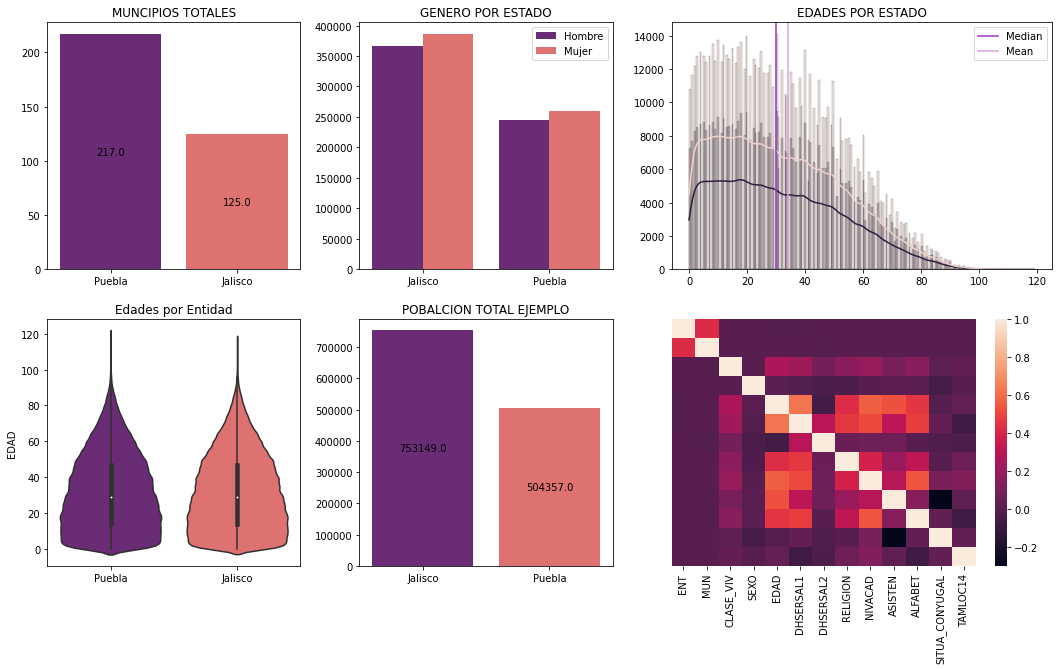

In [8]:
plt.clf()
fig, axes = plt.subplots(2, 3, figsize = (18, 10), gridspec_kw = dict(width_ratios = [4, 4, 6]))

values = []
entidades = ["Puebla", "Jalisco"]
values.append(df_21.MUN.nunique())
values.append(df_14.MUN.nunique())

ax1 = sns.barplot(x = entidades, y = values, ax = axes[0][0], palette = "magma")
ax1.set_title("MUNCIPIOS TOTALES")
for value in ax1.patches:
    ax1.annotate(format(value.get_height(), ".1f"), [value.get_x() + value.get_width() / 2, value.get_height() / 2], va = "center", ha = "center")


# Quiero saber sexo por entidad 
ax2 = sns.countplot(data = df, x = "ENT", hue = "SEXO", ax = axes[0][1], palette = "magma")
ax2.set_xticklabels(["Jalisco", "Puebla"])
ax2.legend(["Hombre", "Mujer"])
ax2.set_xlabel(" ")
ax2.set_title("GENERO POR ESTADO")
ax2.set_ylabel(" ")
# for value in ax2.patches:
#     ax2.annotate(format(value.get_height(), ".1f"), [value.get_x() + value.get_width() / 2, value.get_height() * 0.85], va = "center", ha = "center", xytext = (0, 6), textcoords = 'offset points')

# Edad por Entidad Histograma y Violin Plot
ax3 = sns.histplot(data = df[df.EDAD <= 150], x = "EDAD", hue = "ENT", ax = axes[0][2], kde = True)
ax3.set_xlabel(" ")
ax3.set_title("EDADES POR ESTADO")
ax3.legend(["Puebla", "Jalisco"])
ax3.set_ylabel(" ")
ax3.axvline(np.median(df.EDAD), color = "darkorchid", label = "Median")
ax3.axvline(np.mean(df.EDAD), color = "plum", label = "Mean")
ax3.legend()

ax4 = sns.violinplot(data = df[df.EDAD <= 150], x = "Estado", y = "EDAD", ax = axes[1][0], palette = "magma")
ax4.set_xlabel(" ")
ax4.set_title("Edades por Entidad")

# Mostrar poblacion ejemplo 
df_temp = df.ENT.value_counts().reset_index()
df_temp.columns = ["Entidad", "Valor"]
ax5 = sns.barplot(data = df_temp, x = "Entidad", y = "Valor", ax = axes[1][1], palette = "magma")
ax5.set_xticklabels(["Jalisco", "Puebla"])
ax5.set_title("POBALCION TOTAL EJEMPLO")
ax5.set_ylabel(" ")
ax5.set_xlabel(" ")
for value in ax5.patches:
    ax5.annotate(format(value.get_height(), ".1f"), [value.get_x() + value.get_width() / 2, value.get_height() / 2], va = "center", ha = "center")

# Mostrar heatmap en las posibles correlaciones
ax6 = sns.heatmap(df.corr(), ax = axes[1][2], yticklabels = False)


plt.show()


In [9]:
# Datos sobre EDAD
def edad(df):
    df = df[df.EDAD <= 150]
    print("Estado: ", df.Estado.unique()[0])
    print("Edad Promedio: ", np.mean(df.EDAD))
    print("Edad STD: ", np.std(df.EDAD))
    print("Edad Mediana: ", np.median(df.EDAD))

In [10]:
# Los valores de EDAD son sumamente similares
edad(df_14)
print("")
edad(df_21)

print("\n", ttest_ind(df_14.EDAD, df_21.EDAD))

Estado:  Jalisco
Edad Promedio:  31.961715056854477
Edad STD:  21.095206813187268
Edad Mediana:  29.0

Estado:  Puebla
Edad Promedio:  31.96253871383646
Edad STD:  21.131749601257564
Edad Mediana:  29.0

 Ttest_indResult(statistic=4.067696229458599, pvalue=4.7483111299493824e-05)


<h4>Clase de Vivienda por Estado - Comparativa</h4>

Casa única en el terreno -> 01

Casa que comparte terreno con otra(s) ->  02

Casa dúplex -> 03

Departamento en edificio -> 04

Vivienda en vecindad o cuartería -> 05

Viviendas colectivas -> 10

No especificado de vivienda particular -> 99

<h4>Afiliacion a Servicios de Salud Estado - Comparativa</h4>

el Seguro Social (IMSS) -> 01

el ISSSTE? -> 02

el ISSSTE estatal? -> 03

PEMEX, Defensa o Marina? -> 04

el Seguro Popular o para una Nueva Generación (Siglo XXI) o Instituto de Salud para el Bienestar?  -> 05

el IMSS-PROSPERA o IMSS-BIENESTAR? -> 06

un seguro privado? -> 07

otra institución? -> 08

Entonces, ¿no está afiliada(o) ni tiene derecho a servicios médicos? -> 09

No especificado -> 99

<h4>Religion por Estado - Comparativa</h4>

No especificado -> 9999

<h4>Ultimo Nivel Academico Estado - Comparativa</h4>

Ninguno -> 00

Preescolar -> 01

Primaria -> 02

Secundaria -> 03

Preparatoria o bachillerato general -> 04

Bachillerato tecnológico -> 05

Estudios técnicos o comerciales con primaria terminada -> 06

Estudios técnicos o comerciales con secundaria terminada -> 07

Estudios técnicos o comerciales con preparatoria terminada -> 08

Normal con primaria o secundaria terminada -> 09

Normal de licenciatura -> 10

Licenciatura -> 11

Especialidad -> 12

Maestría -> 13

Doctorado -> 14

No especificado -> 99







In [11]:
# order = [2, 3, 4, 11, 0, 1, 5, 13, 8, 7, 10, 99, 12, 6, 14, 9]

df_viv = df
df_viv.CLASE_VIV  = df_viv.CLASE_VIV.fillna(99)

# Grupos de Edad y Clases de Viviendas
def grupos_edad(x):
    if x.EDAD <= 20:
        return "Joven"
    elif x.EDAD > 20 and x.EDAD <= 30:
        return "Adulto Joven"
    elif x.EDAD > 30 and x.EDAD <= 40:
        return "Adulto Mediano"
    elif x.EDAD > 40 and x.EDAD <= 60:
        return "Adulto Grande"
    elif x.EDAD > 60:
        return "Vejez"

df_viv["GRUPO_EDAD"] = df_viv.apply(grupos_edad, axis = 1)

def grupos_religiosos(x):
    clave = str(x.RELIGION)
    # print(clave)
    # Apartado cristiano 
    if clave[0] == "1":
        if "11" in clave:
            return "Catolico"

        elif "12" in clave:
            return "Catolico Ortodoxo"

        elif "13" in clave:
            return "Protestante"

    # Apartado otros credos
    elif clave[0] == "2":
        if "21" in clave:
            return "Judaismo"
        
        elif "22" in clave:
            return "Islam"

        elif "23" in clave:
            return "Hinduismo"

    # Apartado sin religion
    elif clave[0] =="3":
        return "Sin Religion-Ateo"

    else:
        return "No Especifica"

df["GRUPO_RELIGION"] = df.apply(grupos_religiosos, axis = 1)
    

C:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_26076/2952029315.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viv["GRUPO_EDAD"] = df_viv.apply(grupos_edad, axis = 1)
C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_26076/2952029315.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<Figure size 432x288 with 0 Axes>

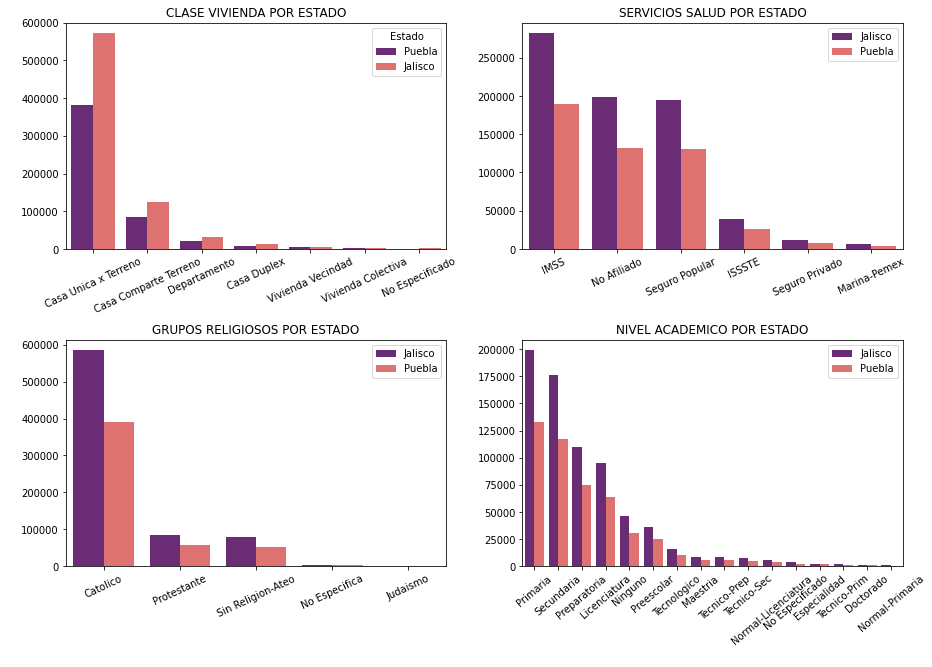

In [12]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

# Tipo de vivienda mas comun en ambos estados
ax1 = sns.countplot(data = df_viv, x = "CLASE_VIV", hue = "Estado", order = [1, 2, 4, 3, 5, 10, 99], palette = "magma", ax = axes[0][0])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
ax1.set_title("CLASE VIVIENDA POR ESTADO")
ax1_tickets = ["Casa Unica x Terreno", "Casa Comparte Terreno","Departamento", "Casa Duplex", "Vivienda Vecindad", "Vivienda Colectiva", "No Especificado"]
ax1.set_xticklabels(ax1_tickets, rotation = 25)

# Tipos de Servicios de salud ambos estados
ax2 = sns.countplot(data = df, x = "DHSERSAL1", hue = "ENT", ax = axes[0][1], order = [1, 9, 5, 2, 7, 4], palette = "magma")
ax2_tickets = ["IMSS", "No Afiliado", "Seguro Popular", "ISSSTE", "Seguro Privado", "Marina-Pemex"]
ax2.set_xticklabels(ax2_tickets, rotation = 25)
ax2.set_xlabel(" ")
ax2.set_ylabel(" ")
ax2.set_title("SERVICIOS SALUD POR ESTADO")
ax2.legend(["Jalisco", "Puebla"])

# Grupos Religiosos ambos estados
ax3 = sns.countplot(data = df, x = "GRUPO_RELIGION", hue = "ENT", ax = axes[1][0], palette = "magma", order = ["Catolico", "Protestante", "Sin Religion-Ateo", "No Especifica", "Judaismo"])
ax3.set_xticklabels(labels = ["Catolico", "Protestante", "Sin Religion-Ateo", "No Especifica", "Judaismo"], rotation = 25)
ax3.legend(["Jalisco", "Puebla"])
ax3.set_xlabel(" ")
ax3.set_ylabel(" ")
ax3.set_title("GRUPOS RELIGIOSOS POR ESTADO")

# Nivele Academicos ambos estados
ax4 = sns.countplot(data = df, x = "NIVACAD", hue = "ENT", ax = axes[1][1], palette = "magma", order = [2, 3, 4, 11, 0, 1, 5, 13, 8, 7, 10, 99, 12, 6, 14, 9])
ax4_ticks = ["Primaria", "Secundaria", "Preparatoria", "Licenciatura", "Ninguno", "Preescolar", "Tecnologico", "Maestria", "Tecnico-Prep", "Tecnico-Sec", "Normal-Licenciatura", "No Especificado", "Especialidad", "Tecnico-Prim", "Doctorado", "Normal-Primaria"]
ax4.set_xticklabels(ax4_ticks, rotation = 40)
ax4.set_xlabel(" ")
ax4.set_ylabel(" ")
ax4.legend(["Jalisco", "Puebla"])
ax4.set_title("NIVEL ACADEMICO POR ESTADO")

plt.subplots_adjust(hspace = 0.4)
plt.show()


<h4>Eejmplo</h4>